# Approach 

## The problem 
- Bike example: 
-- Compare nearly accident - to actual accident cases -> Do they correlate? 
-- Best case: All data is in one dataset 


## Explore the data - what can we see with the data without machine learning 
- have a look at the data and do some exploration 
- How much data is it, how many nearly accidents, whats the gender, what daytime is most, in which bezirk 
- Do near accidents happen more often with phone in hand? &rarr; there is no data about the usage of phones in the dataset
- welche unfall typ am häufigsten ist. &rarr;  Accident caused by turning off the road &rarr; 1224

## Combining data 
Use pandas - dataset near acccident -> One dataframe 
dataset actual accident - the other dataframe 


In [8]:
import pandas as pd 
from os import path

In [9]:
from glob import glob
#in verzeichnis datei filtern

In [10]:
glob("data/*/*.csv")

['data\\accidents_2022\\Unfallorte2022_LinRef.csv']

In [11]:
file_path = path.join("data", "accidents_2022", "Unfallorte2022_LinRef.csv")
file_path

'data\\accidents_2022\\Unfallorte2022_LinRef.csv'

In [12]:
df = pd.read_csv(file_path, sep=";")

<ipython-input-12-f707002b096f>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=";")


In [13]:
df

,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
0,1,1220204125013262022,1,0,54,84,2022,2,19,6,...,1,1,0,0,0,0,"506085,644000001018867","6035085,351999809965491","9,093886180000030","54,463395769999998"
1,2,1220529134013152022,1,0,57,44,2022,5,11,1,...,0,0,0,1,0,0,"593821,621226734016091","6014331,532445689663291","10,440636083000101","54,268303975000002"
2,3,1220508125013982022,1,0,59,73,2022,5,12,1,...,0,1,0,0,0,0,"540417,076000001979992","6045563,334999830462039","9,624949321000029","54,555985573000001"
3,4,1220517152013752022,1,0,3,0,2022,5,8,3,...,1,0,0,0,0,0,"609966,338422868051566","5970404,848156260326505","10,672490491000101","53,870453103000003"
4,5,1220426181013142022,1,0,61,46,2022,4,19,3,...,1,0,0,0,0,0,"533425,841011611977592","5975832,250405009835958","9,509078523000030","53,929808971999996"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256487,256488,16221017001401169170,16,0,53,0,2022,10,11,2,...,0,1,0,0,1,0,"676158,038782960036770","5648311,105042999610305","11,508439963000100","50,959446241000101"
256488,256489,16221207001413256870,16,0,55,0,2022,12,16,4,...,1,1,0,0,0,0,"663063,752786051947623","5651066,280498039908707","11,323387069000001","50,988056225999998"
256489,256490,16221116001105235370,16,0,51,0,2022,11,7,4,...,1,1,0,0,0,0,"640640,685721814050339","5650012,880617620423436","11,003713632000000","50,984505024000001"
256490,256491,16221101001309208720,16,0,63,66,2022,11,6,3,...,0,1,1,0,0,0,"596680,147997146006674","5640181,942186550237238","10,375033228000101","50,905187818000101"


In [14]:
df.columns

Index(['OBJECTID', 'UIDENTSTLAE', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE',
       'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART',
       'UTYP1', 'ULICHTVERH', 'IstStrassenzustand', 'IstRad', 'IstPKW',
       'IstFuss', 'IstKrad', 'IstGkfz', 'IstSonstige', 'LINREFX', 'LINREFY',
       'XGCSWGS84', 'YGCSWGS84'],
      dtype='object')

In [15]:
df[(df['UREGBEZ']) != 0]

,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
2673,2674,2220704000021210020,2,2,3,208,2022,7,7,2,...,1,1,0,0,0,0,"562844,593296710052527","5935241,531718499958515","9,948821533000061","53,562283385000100"
2676,2677,2220503000026738630,2,2,9,221,2022,5,14,3,...,0,1,0,0,0,0,"555651,645035573979840","5936378,833718840032816","9,840439401000030","53,573317051000103"
2677,2678,2220301000046633340,2,7,2,703,2022,3,12,3,...,0,0,0,0,1,0,"568308,953398057026789","5923139,860781669616699","10,028670881000000","53,452840389000102"
2691,2692,2220630000031187020,2,4,7,417,2022,6,18,5,...,0,1,0,0,0,0,"568497,271312449011020","5935557,397569400258362","10,034219717999999","53,564414790999997"
2692,2693,2220201000025589140,2,2,7,219,2022,2,16,3,...,0,1,0,0,0,0,"560619,121244485024363","5933082,503457100130618","9,914807734000020","53,543141013000103"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251375,251376,14221208118223982800,14,5,11,0,2022,12,11,5,...,0,0,0,0,0,1,"776399,005913423956372","5639105,643869070336223","12,925941734000000","50,837532920999998"
251376,251377,14221018149110745880,14,7,29,50,2022,10,15,3,...,1,1,0,0,0,0,"744603,092486788053066","5669353,378777660429478","12,495618222000100","51,123343320000103"
251378,251379,14221102144200908960,14,7,13,0,2022,11,18,4,...,0,1,0,1,0,0,"737418,726432029972784","5694566,411171820014715","12,409852570000099","51,352684078999999"
251379,251380,14221014114320788560,14,5,22,330,2022,10,7,6,...,0,1,0,0,0,0,"777717,821497765020467","5645885,121458049863577","12,949770999000100","50,897722907999999"


In [16]:
#df = pd.read_csv(file_path, sep=";")
#file_path ='https://github.com/simra-project/simra-project.github.io/blob/master/incidents/Berlin-incidents.csv' 
#to access the dayta directly from github
#df = pd.read_csv('Users/mmeug/Documents/HTW/FIW SoSe 24/IKT/bi-accident/data/Berlin-incidents.csv', sep=";")

#df = pd.read_csv(file_path, sep=";", low_memory=False)

In [17]:
df_beFa = df[(df["IstRad"] == 1) & (df["ULAND"] == 11)]

In [18]:
df_beFa

,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
120716,120717,11220726110000076021,11,0,7,7,2022,7,13,3,...,1,0,0,0,0,0,"797934,062047653947957","5820137,080757929943502","13,385059354000100","52,449999820000102"
120723,120724,11221207110000016600,11,0,3,3,2022,12,6,4,...,1,1,0,0,0,0,"801198,846139198052697","5830893,046786880120635","13,442681348000100","52,544618997000001"
120727,120728,11220526110000082361,11,0,12,12,2022,5,22,5,...,1,1,0,0,0,0,"795518,430305948015302","5833308,314601760357618","13,361311944000001","52,569380428999999"
120732,120733,11221107110000007141,11,0,12,12,2022,11,16,2,...,1,1,0,0,0,0,"795410,466116435010917","5833590,942207490094006","13,359975350000100","52,571972517000098"
120757,120758,11220519110000056101,11,0,4,4,2022,5,23,5,...,1,0,0,0,0,0,"786116,330889211036265","5826019,259884309954941","13,216692782000100","52,509052345999997"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240978,240979,11221206110000104510,11,0,11,11,2022,12,18,3,...,1,1,0,0,0,0,"802428,726582280010916","5828891,710788100026548","13,458941341000100","52,525999963000103"
240984,240985,11221228110000087000,11,0,2,2,2022,12,17,4,...,1,0,0,1,0,0,"797120,745900540030561","5823996,071269039995968","13,376563014000100","52,485034538000001"
241000,241001,11221213110000043390,11,0,1,1,2022,12,7,3,...,1,1,0,0,0,0,"799515,159539225976914","5826701,056993260048330","13,414151500999999","52,507972543999998"
241008,241009,11221216110000054850,11,0,1,1,2022,12,14,6,...,1,1,0,0,0,0,"798959,458413455053233","5827286,094626029953361","13,406513610999999","52,513521378000100"


In [19]:
df_beFa.head(5)

,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
120716,120717,11220726110000076021,11,0,7,7,2022,7,13,3,...,1,0,0,0,0,0,"797934,062047653947957","5820137,080757929943502","13,385059354000100","52,449999820000102"
120723,120724,11221207110000016600,11,0,3,3,2022,12,6,4,...,1,1,0,0,0,0,"801198,846139198052697","5830893,046786880120635","13,442681348000100","52,544618997000001"
120727,120728,11220526110000082361,11,0,12,12,2022,5,22,5,...,1,1,0,0,0,0,"795518,430305948015302","5833308,314601760357618","13,361311944000001","52,569380428999999"
120732,120733,11221107110000007141,11,0,12,12,2022,11,16,2,...,1,1,0,0,0,0,"795410,466116435010917","5833590,942207490094006","13,359975350000100","52,571972517000098"
120757,120758,11220519110000056101,11,0,4,4,2022,5,23,5,...,1,0,0,0,0,0,"786116,330889211036265","5826019,259884309954941","13,216692782000100","52,509052345999997"


In [20]:
df_beFa[(df_beFa['UREGBEZ']) != 0]
#In berlin UREGBEZ(Administrative region) is always 0

,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84


In [21]:
df_beFa[(df_beFa['UWOCHENTAG']) ==7]

,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
120827,120828,11220507110000011731,11,0,3,3,2022,5,13,7,...,1,1,0,0,0,0,"799336,376995899947360","5830325,300779440440238","13,414787289000101","52,540556490000000"
120895,120896,11221105110000004581,11,0,3,3,2022,11,15,7,...,1,0,0,0,0,0,"798150,195561205036938","5836595,443890900351107","13,402985151000101","52,597409636000101"
120908,120909,11220716110000044191,11,0,3,3,2022,7,3,7,...,1,1,0,0,0,0,"799218,005168078001589","5830353,660608929581940","13,413072643000000","52,540875704000001"
120941,120942,11220813110000029861,11,0,11,11,2022,8,10,7,...,1,1,0,0,0,0,"804445,937192757031880","5827496,834480609744787","13,487307308000000","52,512375635000097"
120999,121000,11220723110000060831,11,0,7,7,2022,7,18,7,...,1,0,0,0,0,1,"795300,618772509042174","5823602,882448029704392","13,349488568000000","52,482497332999998"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240460,240461,11221210110000029740,11,0,1,1,2022,12,13,7,...,1,1,0,0,0,0,"798455,818628728040494","5829049,341611820273101","13,400696177000000","52,529602302999997"
240562,240563,11221210110000032050,11,0,1,1,2022,12,16,7,...,1,1,0,0,0,0,"798967,145914389053360","5828522,899142369627953","13,407738074000100","52,524603331999998"
240571,240572,11221210110000103790,11,0,3,3,2022,12,23,7,...,1,0,1,0,0,0,"799115,138247070950456","5829131,285386189818382","13,410460227000000","52,529975437000097"
240581,240582,11221210110000029580,11,0,9,9,2022,12,0,7,...,1,1,0,0,0,0,"809339,844211820978671","5818507,294122849591076","13,550859292000000","52,429059846000001"


### Accidents according to the days

- 1 = 281
- 2 = 742
- 3 = 766
- 4 = 851
- 5 = 830
- 6 = 760
- 7 = 428

- Highest accidents are on 4( Wednesday) and least on 1(Sunday)


In [28]:
df_beFa['UWOCHENTAG']=df_beFa['UWOCHENTAG'].replace({1:"Sunday",2:"Monday", 3:"Tuesday", 4: "Wednesday", 5:"Thursday", 6:"Friday",7:"Saturday"}).copy()

<ipython-input-28-0e0ccb61c8fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beFa['UWOCHENTAG']=df_beFa['UWOCHENTAG'].replace({1:"Sunday",2:"Monday", 3:"Tuesday", 4: "Wednesday", 5:"Thursday", 6:"Friday",7:"Saturday"}).copy()


In [38]:
from matplotlib import pyplot as plt
import numpy as np

<Axes: title={'center': 'unfallträchtigste Wochentag'}, xlabel='UWOCHENTAG'>

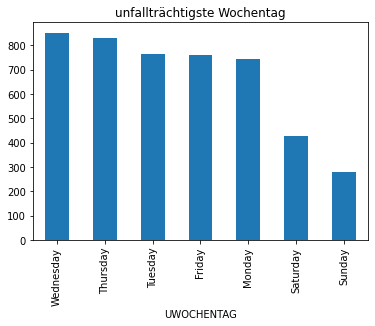

In [55]:
df_beFa['UWOCHENTAG'].value_counts().plot(kind="bar", title='unfallträchtigste Wochentag')



In [40]:
df_beFa['UWOCHENTAG'].mode()

0    Wednesday
Name: UWOCHENTAG, dtype: object

In [41]:
# investigating the involvement of other transportation methods.

df_beFa[(df_beFa['IstSonstige']) ==0]

,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
120716,120717,11220726110000076021,11,0,7,7,2022,7,13,Tuesday,...,1,0,0,0,0,0,"797934,062047653947957","5820137,080757929943502","13,385059354000100","52,449999820000102"
120723,120724,11221207110000016600,11,0,3,3,2022,12,6,Wednesday,...,1,1,0,0,0,0,"801198,846139198052697","5830893,046786880120635","13,442681348000100","52,544618997000001"
120727,120728,11220526110000082361,11,0,12,12,2022,5,22,Thursday,...,1,1,0,0,0,0,"795518,430305948015302","5833308,314601760357618","13,361311944000001","52,569380428999999"
120732,120733,11221107110000007141,11,0,12,12,2022,11,16,Monday,...,1,1,0,0,0,0,"795410,466116435010917","5833590,942207490094006","13,359975350000100","52,571972517000098"
120757,120758,11220519110000056101,11,0,4,4,2022,5,23,Thursday,...,1,0,0,0,0,0,"786116,330889211036265","5826019,259884309954941","13,216692782000100","52,509052345999997"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240978,240979,11221206110000104510,11,0,11,11,2022,12,18,Tuesday,...,1,1,0,0,0,0,"802428,726582280010916","5828891,710788100026548","13,458941341000100","52,525999963000103"
240984,240985,11221228110000087000,11,0,2,2,2022,12,17,Wednesday,...,1,0,0,1,0,0,"797120,745900540030561","5823996,071269039995968","13,376563014000100","52,485034538000001"
241000,241001,11221213110000043390,11,0,1,1,2022,12,7,Tuesday,...,1,1,0,0,0,0,"799515,159539225976914","5826701,056993260048330","13,414151500999999","52,507972543999998"
241008,241009,11221216110000054850,11,0,1,1,2022,12,14,Friday,...,1,1,0,0,0,0,"798959,458413455053233","5827286,094626029953361","13,406513610999999","52,513521378000100"


### To what extent are other transpotation means involved.

- Since the dataset has already been filtered to mainly bicycle involved accidents, we will go through each other mode of transportation to find out how often are they involved in a bicycle accident

- There are 4658 bicycle accidents in total in 2022
- IstPKW = 3178
- IstFuss = 273
- IstKrad = 88
- IstGkfz = 93
- IstSonstige = 395



In [42]:
# Lichtverhältnis

df_beFa[(df_beFa['ULICHTVERH']) ==2]

,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
120723,120724,11221207110000016600,11,0,3,3,2022,12,6,Wednesday,...,1,1,0,0,0,0,"801198,846139198052697","5830893,046786880120635","13,442681348000100","52,544618997000001"
120727,120728,11220526110000082361,11,0,12,12,2022,5,22,Thursday,...,1,1,0,0,0,0,"795518,430305948015302","5833308,314601760357618","13,361311944000001","52,569380428999999"
120757,120758,11220519110000056101,11,0,4,4,2022,5,23,Thursday,...,1,0,0,0,0,0,"786116,330889211036265","5826019,259884309954941","13,216692782000100","52,509052345999997"
120856,120857,11221110110000012311,11,0,2,2,2022,11,19,Thursday,...,1,0,0,0,0,1,"801855,411551185999997","5826469,899691260419786","13,448319236000000","52,504610868000000"
120884,120885,11221103110000003461,11,0,2,2,2022,11,18,Thursday,...,1,0,0,0,0,1,"803091,369442753959447","5827650,782878769561648","13,467548291000099","52,514509789999998"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240907,240908,11221216110000055010,11,0,7,7,2022,12,21,Friday,...,1,1,0,0,0,0,"795108,988904246012680","5825297,404789079912007","13,348175569000000","52,497791167000102"
240977,240978,11221229110000084590,11,0,7,7,2022,12,18,Thursday,...,1,1,0,0,0,0,"795460,856936929048970","5824433,036662720143795","13,352577223000001","52,489852376000002"
240978,240979,11221206110000104510,11,0,11,11,2022,12,18,Tuesday,...,1,1,0,0,0,0,"802428,726582280010916","5828891,710788100026548","13,458941341000100","52,525999963000103"
240984,240985,11221228110000087000,11,0,2,2,2022,12,17,Wednesday,...,1,0,0,1,0,0,"797120,745900540030561","5823996,071269039995968","13,376563014000100","52,485034538000001"


### Lichtverhältniss

- 0(daylight) = 2570
- 1(twiglight)  = 156
- 2(darkness)= 452 

In [43]:
# Straßezustand

df_beFa[(df_beFa['IstStrassenzustand']) == 2]

,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
122438,122439,11221215110000045940,11,0,3,3,2022,12,12,Thursday,...,1,1,0,0,0,0,"802548,379654238000512","5831683,808604179881513","13,463241840000000","52,550958764000001"
229794,229795,11220106110000004061,11,0,1,1,2022,1,7,Thursday,...,1,0,0,0,0,0,"796511,319026732002385","5827623,325976169668138","13,370844336000101","52,517880687999998"
229934,229935,11220118110000042691,11,0,1,1,2022,1,7,Tuesday,...,1,1,0,0,0,0,"794139,374069342040457","5831106,124889709986746","13,339071333000000","52,550386281999998"
230016,230017,11220118110000046761,11,0,10,10,2022,1,8,Tuesday,...,1,1,0,0,0,0,"806552,859002965036780","5829122,544337649829686","13,519755206000101","52,525765605000103"
230183,230184,11220120110000045411,11,0,1,1,2022,1,19,Thursday,...,1,1,0,0,0,0,"800065,272994937025942","5826411,000507060438395","13,421971235000100","52,505070361999998"
230269,230270,11220121110000051101,11,0,1,1,2022,1,13,Friday,...,1,1,0,0,0,0,"800049,009240685030818","5826653,118152050301433","13,421950548000000","52,507249503000097"
230288,230289,11220121110000048831,11,0,2,2,2022,1,8,Friday,...,1,1,0,0,0,0,"797843,033067445969209","5824926,431360930204391","13,387999898000000","52,492980610000103"
230411,230412,11220120110000046021,11,0,4,4,2022,1,17,Thursday,...,1,0,0,0,0,0,"791343,792376606026664","5821991,880796849727631","13,289979680000000","52,470180298000102"
230457,230458,11220121110000050481,11,0,1,1,2022,1,14,Friday,...,1,1,0,0,0,0,"797519,758221670985222","5831024,351831769570708","13,388706545000000","52,547817506999998"
230577,230578,11220120110000044391,11,0,11,11,2022,1,18,Thursday,...,1,0,0,0,0,0,"806786,833692090003751","5832508,056898030452430","13,526319223000000","52,555975256000103"


### Straßezustand (road surface conditions):

- 0(dry) = 2648
- 1(wet/damp/slippery)  = 511
- 2(slippery(Winter)) = 19 

In [44]:
# accidents involving personal injury

df_beFa[(df_beFa['UKATEGORIE']) == 3 ]

,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
120716,120717,11220726110000076021,11,0,7,7,2022,7,13,Tuesday,...,1,0,0,0,0,0,"797934,062047653947957","5820137,080757929943502","13,385059354000100","52,449999820000102"
120727,120728,11220526110000082361,11,0,12,12,2022,5,22,Thursday,...,1,1,0,0,0,0,"795518,430305948015302","5833308,314601760357618","13,361311944000001","52,569380428999999"
120732,120733,11221107110000007141,11,0,12,12,2022,11,16,Monday,...,1,1,0,0,0,0,"795410,466116435010917","5833590,942207490094006","13,359975350000100","52,571972517000098"
120757,120758,11220519110000056101,11,0,4,4,2022,5,23,Thursday,...,1,0,0,0,0,0,"786116,330889211036265","5826019,259884309954941","13,216692782000100","52,509052345999997"
120763,120764,11221104110000002751,11,0,4,4,2022,11,12,Friday,...,1,1,0,0,0,0,"793067,932298711966723","5826819,151302670128644","13,319535078000101","52,512532963000098"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240978,240979,11221206110000104510,11,0,11,11,2022,12,18,Tuesday,...,1,1,0,0,0,0,"802428,726582280010916","5828891,710788100026548","13,458941341000100","52,525999963000103"
240984,240985,11221228110000087000,11,0,2,2,2022,12,17,Wednesday,...,1,0,0,1,0,0,"797120,745900540030561","5823996,071269039995968","13,376563014000100","52,485034538000001"
241000,241001,11221213110000043390,11,0,1,1,2022,12,7,Tuesday,...,1,1,0,0,0,0,"799515,159539225976914","5826701,056993260048330","13,414151500999999","52,507972543999998"
241008,241009,11221216110000054850,11,0,1,1,2022,12,14,Friday,...,1,1,0,0,0,0,"798959,458413455053233","5827286,094626029953361","13,406513610999999","52,513521378000100"


### Road traffic accidents involving personal injury

- 1 = Accident with persons killed        &rarr; 6
- 2 = Accident with seriously injured     &rarr; 347
- 3 = Accident with slightly injured      &rarr; 2825

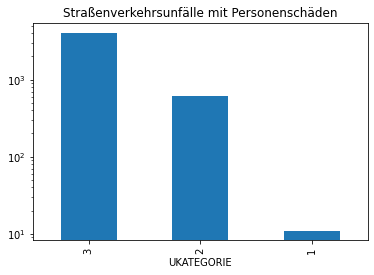

In [54]:
df_beFa['UKATEGORIE'].value_counts().plot(kind="bar", title='Straßenverkehrsunfälle mit Personenschäden').set_yscale('log')
#fig, ax = plt.subplots()
#ax.set_yscale('log')


In [86]:
# Type of accidents

df_beFa[(df_beFa['UTYP1']) == 8 ]

,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84


### Type of accidents

- 1 = Driving accident &rarr; 21
- 2 = Accident caused by turning off the road &rarr; 1224
- 3 = Accident caused by turning into a road or by crossing it &rarr; 898
- 4 = Accident caused by crossing the road &rarr; 7
- 5 = Accident involving stationary &rarr; 561
- 6 = Accident between vehicles moving along in carriageway &rarr; 132
- 7 = Other accident &rarr; 0

In [112]:
df_beFa['UTYP1'].value_counts()

UTYP1
2    1224
3     898
5     561
6     335
7     132
1      21
4       7
Name: count, dtype: int64

In [103]:
# Kinds of accidents

df_beFa[(df_beFa['UART'] == 0)]

#df_beFa[(df_beFa['UART'] == 3) & (df_beFa['IstPKW']== 0)]

,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
120727,120728,11220526110000082361,11,0,12,12,2022,5,22,5,...,1,1,0,0,0,0,"795518,430305948015302","5833308,314601760357618","13,361311944000001","52,569380428999999"
121507,121508,11220916110000047221,11,0,6,6,2022,9,21,6,...,1,1,0,0,0,0,"791058,127677684999071","5818815,427128289826214","13,283017106999999","52,441855310000101"
121658,121659,11220601110000004011,11,0,2,2,2022,6,21,4,...,1,1,0,0,0,0,"802067,712995304958895","5827992,226770849898458","13,452819235000000","52,518138029000099"
121766,121767,11220701110000000811,11,0,4,4,2022,7,18,6,...,1,1,0,0,0,0,"792255,587834144942462","5826660,650656090117991","13,307459538000000","52,511547909999997"
121873,121874,11221021110000058091,11,0,6,6,2022,10,17,6,...,1,1,0,0,0,0,"789588,263306064996868","5817974,376640030182898","13,260723956000000","52,435095336000103"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240530,240531,11221209110000025930,11,0,2,2,2022,12,19,6,...,1,1,0,0,0,0,"801584,773551302962005","5825940,290268800221384","13,443864346000099","52,500013564000000"
240653,240654,11221213110000041100,11,0,7,7,2022,12,15,3,...,1,1,0,0,0,0,"794487,163663950050250","5823342,571715109981596","13,337314581999999","52,480603104000103"
240812,240813,11221204110000022930,11,0,6,6,2022,12,12,1,...,1,1,0,0,0,0,"790900,272511207032949","5817771,197601689957082","13,279792471000100","52,432577590000101"
240931,240932,11221214110000043260,11,0,3,3,2022,12,12,4,...,1,1,0,0,0,0,"802276,355474499985576","5831430,882267449982464","13,459011878000100","52,548842835000102"


### Kinds of accidents
- 1 = Collision with another vehicle which starts, stops or is stationary &rarr; 533
- 2 = Collision with another vehicle moving ahead or waiting &rarr; 239
- 3 = Collision with another vehicle moving laterally in the same direction &rarr;151
- 4 = Collision with another oncoming vehicle &rarr;26
- 5 = Collision with another vehicle which turns into or crosses a road &rarr;1999
- 6 = Collision between vehicle and pedestrian &rarr;6
- 7 = Collision with an obstacle in the carriageway &rarr;2
- 8 = Leaving the carriageway to the right &rarr;1
- 9 = Leaving the carriageway to the left &rarr;1
- 0 = Accident of another kind &rarr;220

In [111]:
df_beFa['UART'].value_counts()

UART
5    1999
1     533
2     239
0     220
3     151
4      26
6       6
7       2
8       1
9       1
Name: count, dtype: int64

In [113]:
#Bezirk

df_beFa['UKREIS'].value_counts()

UKREIS
1     607
2     362
3     348
4     346
7     282
6     260
9     228
8     210
11    151
12    130
10    130
5     124
Name: count, dtype: int64

In [115]:
df_beFa[(df_beFa['UKREIS'] == 8)]

,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
228866,228867,11220108110000008701,11,0,8,8,2022,1,13,7,...,1,1,0,0,0,0,"799765,100376488990150","5818601,706672940403223","13,410545205000100","52,435236385000103"
229994,229995,11220308110000019621,11,0,8,8,2022,3,15,3,...,1,1,0,0,0,0,"801774,134313015034422","5821103,619512329809368","13,442268501000100","52,456556998000103"
230172,230173,11220214110000033971,11,0,8,8,2022,2,14,2,...,1,1,0,0,0,0,"801118,235286111943424","5821896,511573210358620","13,433359972000099","52,464025698000100"
230287,230288,11220203110000003251,11,0,8,8,2022,2,19,5,...,1,1,0,0,0,0,"800698,094818742945790","5822923,009090679697692","13,428119432000100","52,473457957000100"
230313,230314,11220211110000086821,11,0,8,8,2022,2,11,6,...,1,1,0,0,0,0,"801403,508582039037719","5824762,425615379586816","13,440136476000101","52,489556286000003"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239722,239723,11221123110000056281,11,0,8,8,2022,11,16,4,...,1,1,0,0,0,0,"801578,929012469947338","5822853,220563099719584","13,440985357000001","52,472346833000103"
239736,239737,11221221110000074550,11,0,8,8,2022,12,12,4,...,1,1,0,0,0,0,"801719,433954183012247","5822126,952857989817858","13,442390884000099","52,465759562000102"
240157,240158,11221228110000086600,11,0,8,8,2022,12,15,4,...,1,1,0,0,0,0,"800533,642792274942622","5823371,072654849849641","13,426109288000101","52,477564633000000"
240239,240240,11221222110000078300,11,0,8,8,2022,12,12,5,...,1,1,0,0,0,0,"801167,752326881978661","5824104,853597420267761","13,436080565999999","52,483792412000099"


In [60]:
#df_beFa.describe()

#describes doesn't work properly on this dataset i.e it doesn't provide the necessary info

In [61]:
#df_near_accident = pd.DataFrame({"IstRad": [1,0,1,1,1,1,1,1,1,1,1,1], "Scary_near_accident": [1,0,1,1,1,1,1,1,1,1,1,1]})


#df.merge(df_near_accident, on="IstRad", how="left")

near accident -> Real accident? 

In [62]:
#df[(df["IstRad"] == 1)]

Mmeughaiys Homework